# Dataset Iris 

Es uno de los conjuntos de datos más conocidosby utilizados en el aprendizaje automático. Fué introducido por el estadistico y biólogo Ronald A Fishesr en 1936.

# Caracteristicas del dataset:
1. Collumnas o features: Longitud del sepalo (Sepal length) en cm
3. Ancho del sépalo (Sepal width) en cm.
4. Longitus del pétalo (petal length) en cm.
5. Ancho del pétalo (petal width) en cm.

## Etiqueta (target)
- **Tipo de flor**: Setosa, Visicolor, virgínica, (tres especies de iris)
- **Tamaño**: 150 filas con cuatro caracteristicas y una clase de salida
  

# Formulación del problema

Un cliente botánico necesita un modelo para **predecir automáticamente la especie de una flor iris** basándose únicamente en las caracteristicas medibles de la flor (Longitud y ancho de los sépalos y pétalos). Actualmente esta clasificación  se realiza manualmente, lo que consum mucho tiempo.

## Requerimientos del cliente:
1. El modelo debe clasificar las flores en Stosa, Versicolor, o Virgínica.
2. La precision del modelo debe ser mayor al 85 % para confiar en el modelo.
3. El cliente requiere una solucion que sea modular y fácil de interpretar.
   

# Paso 1: Cargar los datos

## Contexto
El dataset es uno de los más usados para el aprendizaje automático. Está disponible en sklearn.datasets y se puede cargar facilmente domo un DataFrame y procesamiento. Las caracteristicas serán las columnas y las etiquetas seran las especies de flores.

In [1]:
#Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Construccion de l dataFrame

Para efecto de simular todo el proceso de desarrollo, se convierte a variable categorica la Columna de la etiqueta

In [17]:
#Carga del dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns = iris.feature_names)                 #Creación del dataframe
df['species'] = iris.target                                                     #Se agrega columna de etiquetas 
dicc_map = {0:'setosa', 1: 'vesicolor', 2:'virginica'}                          #Proceso de convertir columna numerica a categorica
df['species'] = df['species'].map(dicc_map)                                     #Se transforma la columna "species" de numérica a categorica
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# Paso 2: Analisis exploratorio de DATOS (EDA)

# Contexto
En este paso exploramos la estructura y distribución de los datos:

1. Comprender la distribución estadistica.
2. Identificar patrones mediante gráficos.
3. Verificar si hay valores nulos o datos atípicos
   
# Analisis estadístico y visualizacion


 Descripcion estadistica del dataset: 

 Valores nulos del dataset:  sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


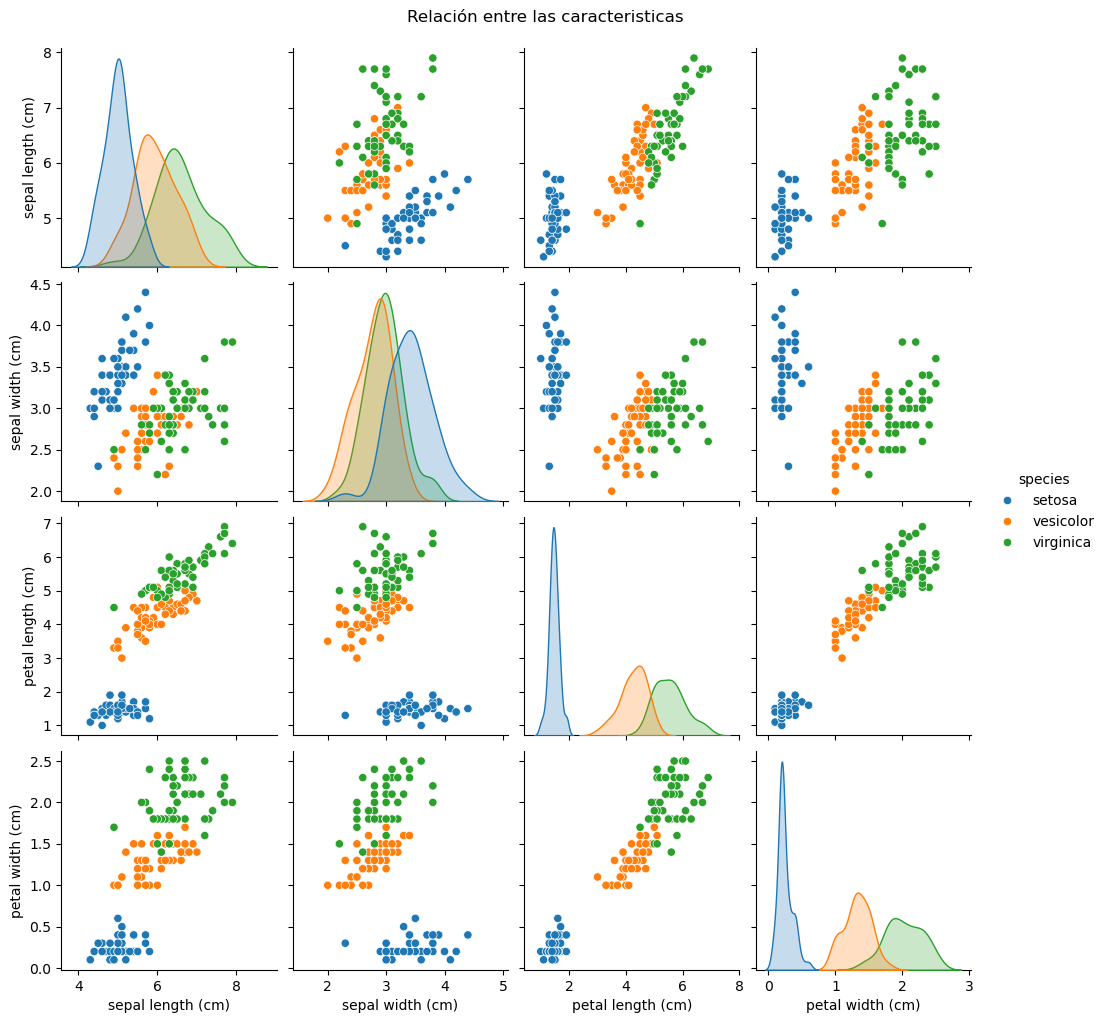

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
#Analisis estadístico básico
print("\n Descripcion estadistica del dataset: ")

#Verificar sy hay valores nulos
print("\n Valores nulos del dataset: ", df.isnull().sum())

#Visualización de la distribución de las caracteristicas
sns.pairplot(df , hue='species', diag_kind='kde')
plt.suptitle("Relación entre las caracteristicas ", y=1.02)
plt.show()
df.describe()

# Paso 3: Preprocesamiento de los Datos
## Contexto
Antes de entrenar el modelo, debemos procesar los datos:

1. Convertir las etiquetas en valores numéricos.
2. Normalizar (Escalar) Las caracteristicas para mejorar el rendimiento.
3. Garantizar que no haya datos inconsistentes.
### Código

En el codigo que sigue creamos un data set auxiliar con la columna "species convertida a variable numérica.
se construye un dataSet escalizado sin la columna de etiqueta.

Se crea el DataFrame con las caracteristicas escalizadas y finalmente se le agrega la serie de las etiquetas

Conceptualmente es necesario aclarar que se escaliza las caracteristicas del dataFrame, por eso se toman los datos sin etiquetas.
solo despues de escalizar se reinserta la columna de etiquetas.


En machine learning, la clase LabelEncoder() pertenece a la biblioteca scikit-learn y se utiliza para convertir etiquetas categóricas (valores no numéricos) en valores numéricos, de manera que puedan ser procesados por los algoritmos de aprendizaje automático.

# ¿Qué hace LabelEncoder?

Transforma valores categóricos (como nombres de categorías o clases) en números enteros.
Asigna un número único a cada categoría de forma consecutiva, comenzando desde 0.
Es útil para preparar datos categóricos antes de entrenar un modelo.

# Clase StandardScaler 
Se utiliza StandardScaler de scikit-learn para estandarizar las características numéricas del DataFrame.
Estandarización significa que los datos tendrán una media de 0 y una desviación estándar de 1. Esto es útil porque muchos modelos de machine learning funcionan mejor con datos estandarizados.

## El escalizado y la columna target del dataset


El motivo principal por el que se separa la columna de etiquetas y no se escaliza junto con las características es que las etiquetas no deben ser transformadas ni modificadas en el proceso de estandarización. Vamos a analizar esto en detalle.

1. ¿Qué es el escalado (o estandarización)?
El escalado o estandarización transforma las características numéricas de un conjunto de datos para que tengan una media de 0 y una desviación estándar de 1. Esto asegura que las características tengan la misma escala, lo cual es importante para muchos algoritmos de machine learning (como SVM, KNN, redes neuronales, etc.).

Sin embargo, las etiquetas no representan características que deban estandarizarse. Son valores categóricos que simplemente identifican clases (como 0, 1, 2 en el caso de Iris). Estas etiquetas se usan para que el modelo sepa a qué clase pertenece cada muestra, pero no forman parte de las entradas que el modelo necesita procesar matemáticamente.

In [20]:
label_encoder = LabelEncoder()                                     #Se crea una instancia de la clase Label-encoder
dicc_map = {'setosa':0,'vesicolor':1,'virginica':2}
df_aux=df.copy()

df_aux['species'] = df['species'].map(dicc_map)  
scaler = StandardScaler()                                     #Escalizamos las columnas de caracteristicas
scaled_features = scaler.fit_transform(df_aux.iloc[:, :-1])
##df_aux['species'] = iris.target                               #Reinsertamos la columna de etiquetas como forma de simulacion de pasar de categorica a numerico

#Creamos un dataFrame nuevo con las caracteristicas escaladas
df_scaled = pd.DataFrame(data = scaled_features, columns=iris.feature_names)
df_scaled['species'] = df_aux['species']




# Analisis del codigo anterior
El uso de StandardScaler tiene el propósito de normalizar o estandarizar las caracteristicas numéricas en el conjunto de datos iris, ofrece beneficios, especialmente en el contexto de machine learning y analisis de datos.

## StandardScaler
1. Calcula la media  y la desviación estándar de cada característica númerica.
2. Transforma los datos para que tengan
   - Media = 0 y S = 1.
4. Formula aplicada

   z = (X - media)/S

## Beneficios de standarizar los datos
### Evitar el sesgo hacia caracteristicas con escalas grandes: 
   Algunas variables númericas tienen rangos mucho mas  grandes que otras (Por ejemplo sepal_length puede tener un rango entre 4 y 8 mientras que   petal_width está entre 0 y 2, Sin estandarizar, los pod´rian dar mayor peso(importancia) a las variables de mayor scala lo cual sesga los resultados
3. Mejor rendimiento en los algoritmos sensibles a la escala.
   - Algoritmos como:
   - 1. Regresión logística.
     2. SVM (Maquina de soporte vectorial).
     3. K Nearest Neighbords (K-NN) Vecinos más cercanos
     4. PCA (Analisis de componentes principales)
        Estos algoritmos dependen de la distancia o proyecciones en el espacio, y la estandarización asegura que todas las variables contribuyan por igual.

# Paso 4: Division del dataset

## Contexto
Dividimos el dataset en dos partes:
- Entrenamiento (80%): Usado para entrenar el modelo
- Prueba(20%): Usado para evaluar la precisión  del modelo.

### Código  

# Obtencion de los datos de entrebamiento y prueba.

# ¿Qué es train_test_split?

La función train_test_split separa los datos en dos subconjuntos:

Conjunto de entrenamiento (train): Se utiliza para ajustar (entrenar) el modelo.
Conjunto de prueba (test): Se utiliza para evaluar el modelo y medir su capacidad de generalización.
El objetivo principal de esta división es asegurarse de que el modelo se evalúe en datos que no ha visto durante el entrenamiento, para evitar problemas como el sobreajuste (overfitting).

## train_test_split de la biblioteca scikit-learn


#  ¿Qué es train_test_split?

Este código utiliza la función train_test_split de la biblioteca scikit-learn para dividir un conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. Vamos a analizar cada parte en detalle:

La función train_test_split separa los datos en dos subconjuntos:

Conjunto de entrenamiento (train): Se utiliza para ajustar (entrenar) el modelo.
Conjunto de prueba (test): Se utiliza para evaluar el modelo y medir su capacidad de generalización.
El objetivo principal de esta división es asegurarse de que el modelo se evalúe en datos que no ha visto durante el entrenamiento, para evitar problemas como el sobreajuste (overfitting).


In [21]:
X = df_scaled.iloc[:, :-1]   # Datos de prueba de las caracteristicas
Y = df_scaled['species']     # Datos de las etiquetas

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)



X: La matriz de características (input data). Representa las variables de entrada, como las columnas de datos numéricos o categóricos (sin incluir las etiquetas de clase).

Ejemplo: En el conjunto Iris, X podría ser las características como sepal_length, sepal_width, etc.
Y: La variable objetivo (target). Contiene las etiquetas de clase o valores que queremos predecir.

Ejemplo: En Iris, Y sería la columna con las etiquetas setosa, versicolor, virginica.
test_size=0.2: Define el tamaño del conjunto de prueba como un porcentaje del conjunto total. En este caso, el 20% de los datos se asignará al conjunto de prueba, y el 80% al conjunto de entrenamiento.

Si tienes 150 muestras en total, entonces:
80% (120 muestras) → Entrenamiento.
20% (30 muestras) → Prueba.
random_state=42: Fija una "semilla" para que la división sea reproducible. Esto significa que si ejecutas este código varias veces, obtendrás la misma división de datos cada vez. Cambiar el valor de random_state o no establecerlo dará una división diferente en cada ejecución.

X_train: Contiene el subconjunto de características para entrenamiento (80% de X).

X_test: Contiene el subconjunto de características para prueba (20% de X).

Y_train: Contiene las etiquetas (o valores objetivo) correspondientes a X_train.

Y_test: Contiene las etiquetas correspondientes a X_test.



In [22]:
# Conjunto  de datos de las caracteristicas
print("Datos de caracteristica para entrenamiento \n")
print(X_train)

Datos de caracteristica para entrenamiento 

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22           -1.506521          1.249201          -1.567576         -1.315444
15           -0.173674          3.090775          -1.283389         -1.052180
65            1.038005          0.098217           0.364896          0.264142
11           -1.264185          0.788808          -1.226552         -1.315444
42           -1.748856          0.328414          -1.397064         -1.315444
..                 ...               ...                ...               ...
71            0.310998         -0.592373           0.137547          0.132510
106          -1.143017         -1.282963           0.421734          0.659038
14           -0.052506          2.169988          -1.453901         -1.315444
92           -0.052506         -1.052767           0.137547          0.000878
102           1.522676         -0.131979           1.217458          1.185567

[120 rows x 4 colu

In [8]:
#Vector de etiquetas para el entrenamiento
print("Etquetas para el entrenamiento \n")
print(Y_train)

Etquetas para el entrenamiento 

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int64


In [23]:
#Mostrando el tamaño de los datos 

print("\n Tamaño de los conjuntos: ")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")



 Tamaño de los conjuntos: 
X_train: (120, 4), X_test: (30, 4)
Y_train: (120,), Y_test: (30,)


# Paso 5: Entrenamiento del modelo

Aquí se crea una instancia de la clase LogisticRegression con parámetros personalizados:

max_iter=200:

Especifica el número máximo de iteraciones que realizará el algoritmo de optimización (por defecto es 100).
Este valor es útil si el modelo no converge con el límite predeterminado.
En problemas más complejos, puedes aumentar este número para garantizar que el algoritmo logre encontrar una solución óptima.
multi_class='ovr':

Significa "One-vs-Rest" (Uno contra el resto). Es una estrategia para manejar problemas de clasificación multiclase.
En esta estrategia, se entrena un modelo binario para cada clase. Para clasificar una muestra, cada modelo predice la probabilidad de pertenecer a su clase específica, y se selecciona la clase con la probabilidad más alta.
Alternativamente, podrías usar 'multinomial', que utiliza un enfoque conjunto para todas las clases, pero esto requiere que la función de penalización sea 'lbfgs' o 'saga'.


In [24]:
modelo = LogisticRegression(max_iter = 200, multi_class = 'ovr')
modelo.fit(X_train, Y_train)

#Evaluar la precision en el conjunto de entrenamiento

print("\nPrecisión en el conjunto de entrenamiento: ")
print(modelo.score(X_train, Y_train))


Precisión en el conjunto de entrenamiento: 
0.9333333333333333


C:\Users\12345\anaconda3\envs\mi_entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# Paso 6: Matriz de confusion
La matriz de confusión muestra como el modelo clasificó las etiquetas en el econjunto de prueba

In [25]:
#Matriz de confusion
y_pred = modelo.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)

#mostrar Matriz de confusión
print(f"Matrix de confusion: {conf_matrix}")

#Reporte de clasificación

print("\nReporte de clasificacion: ")
print(classification_report(Y_test, y_pred))

Matrix de confusion: [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Reporte de clasificacion: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Matriz de confusión

La matriz de confusión es una herramienta clave en la evaluación de modelos de clasificación en machine learning. Representa visualmente el desempeño del modelo comparando las predicciones realizadas por el modelo con los valores reales de las clases en el conjunto de datos.

Es una matriz de dimensiones n X n, donde n es el número de clases en el problema de clasificación. Cada celda de la matrix contiene la cantidad de observaciones que caen en una categoría especifica de predicción frente a la clase verdadera.

| Columna 1     | Prediccion positiva      | prediccion negativa      |
| --------- ----| -------------------------| ------------------------ |
| Real Positivo | Verdaderos positivos (TP)| Falsos Negativos (FN)    |
| Real Negativa | Falsos Positivos(FP)     | Verdaderos Negativos (TN)|

TP (True Positive): Numero de veces que el modelo predice la clase positiva.
FN (False Negative): Es el número de casos donde el la clase real es positiva, pero el modelo predice la negativa
FP (Falso positivo): Casos donde la clase real es positiva, pero el modelo predice que es negativa.
TN (True) : Numero de veces donde el modelo predice correctamente la clase negativa.

Ejemplo:
### **Matriz de Confusión para Predicción de Cáncer**

|                     | Predicción: Enfermo (Positivo) | Predicción: No Enfermo (Negativo) |
|---------------------|-------------------------------|----------------------------------|
| **Real: Enfermo**     | 85                            | 10                               |
| **Real: No Enfermo**  | 5                             | 100                              |

### **Análisis de la Matriz de Confusión**

#### **Definiciones:**
- **Clase Positiva (Enfermo)**: El paciente tiene cáncer.
- **Clase Negativa (No Enfermo)**: El paciente no tiene cáncer.

#### **Elementos de la Matriz de Confusión:**
- **Verdaderos Positivos (TP)**: El modelo predijo "Enfermo" correctamente. (85)
- **Falsos Negativos (FN)**: El modelo predijo "No Enfermo" cuando el paciente estaba realmente enfermo. (10)
- **Falsos Positivos (FP)**: El modelo predijo "Enfermo" cuando el paciente realmente no estaba enfermo. (5)
- **Verdaderos Negativos (TN)**: El modelo predijo "No Enfermo" correctamente. (100)

---

#### **Métricas de Evaluación:**

1. **Precisión (Accuracy)**:
   La precisión mide la proporción de predicciones correctas sobre todas las predicciones realizadas.

   \[
   \text{Precisión} = \frac{TP + TN}{TP + TN + FP + FN}
   \]

   Sustituyendo los valores de la matriz:

   \[
   \text{Precisión} = \frac{85 + 100}{85 + 100 + 5 + 10} = \frac{185}{200} = 0.925 \, (\text{92.5%})
   \]

   Esto significa que el 92.5% de las predicciones fueron correctas.

---

2. **Precisión de la Clase Positiva (Precisión)**:
   La precisión de la clase positiva mide cuántos de los pacientes que el modelo clasificó como "Enfermos" realmente lo estaban.

   \[
   \text{Precisión} = \frac{TP}{TP + FP}
   \]

   Sustituyendo:

   \[
   \text{Precisión} = \frac{85}{85 + 5} = \frac{85}{90} = 0.9444 \, (\text{94.44%})
   \]

   Esto indica que, de todos los pacientes que fueron clasificados como enfermos, el 94.44% realmente lo estaban.

---

3. **Sensibilidad (Recall) o Tasa de Verdaderos Positivos**:
   La sensibilidad mide la proporción de pacientes enfermos que el modelo detectó correctamente.

   \[
   \text{Sensibilidad (Recall)} = \frac{TP}{TP + FN}
   \]

   Sustituyendo:

   \[
   \text{Sensibilidad} = \frac{85}{85 + 10} = \frac{85}{95} = 0.8947 \, (\text{89.47%})
   \]

   Esto significa que el modelo detectó correctamente al 89.47% de los pacientes que realmente tenían cáncer.

---

4. **Especificidad**:
   La especificidad mide la proporción de pacientes no enfermos que el modelo clasificó correctamente como no enfermos.

   \[
   \text{Especificidad} = \frac{TN}{TN + FP}
   \]

   Sustituyendo:

   \[
   \text{Especificidad} = \frac{100}{100 + 5} = \frac{100}{105} = 0.9524 \, (\text{95.24%})
   \]

   Esto indica que el 95.24% de los pacientes no enfermos fueron clasificados correctamente como no enfermos.

---

5. **Puntaje F1 (F1-Score)**:
   El **Puntaje F1** es la media armónica de la precisión y la sensibilidad. Es útil cuando hay un desequilibrio entre las clases y se necesita un equilibrio entre estas dos métricas.

   \[
   \text{F1-Score} = 2 \times \frac{\text{Precisión} \times \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}}
   \]

   Sustituyendo:

   \[
   \text{F1-Score} = 2 \times \frac{0.9444 \times 0.8947}{0.9444 + 0.8947} = 2 \times \frac{0.8445}{1.8391} = 0.9167 \, (\text{91.67%})
   \]

   Este puntaje combina la precisión y la sensibilidad en un solo valor.

---

#### **Resumen de Métricas:**
- **Precisión**: 92.5%
- **Precisión (Clase Positiva)**: 94.44%
- **Sensibilidad (Recall)**: 89.47%
- **Especificidad**: 95.24%
- **F1-Score**: 91.67%

Estas métricas ayudan a evaluar el rendimiento del modelo. Un modelo con alta precisión, sensibilidad y especificidad será útil en un contexto médico, donde es importante no solo detectar correctamente a los pacientes enfermos, sino también evitar diagnósticos incorrectos.

---

#### **Conclusiones:**
- **Alta Precisión y Especificidad**: El modelo es bastante bueno para clasificar correctamente tanto a los enfermos como a los no enfermos.
- **Sensibilidad ligeramente menor**: Aunque el modelo tiene una buena capacidad para detectar a los pacientes enfermos (89.47%), aún hay algunos falsos negativos (pacientes enfermos mal clasificados como no enfermos).
- **F1-Score razonable**: El modelo tiene un buen equilibrio entre precisión y sensibilidad.

Si el modelo estuviera siendo utilizado en la práctica médica, podría ser importante ajustar los parámetros o usar técnicas adicionales para mejorar la detección de los pacientes enfermos (incrementando la sensibilidad), para asegurar que no se pasen por alto casos de cáncer.


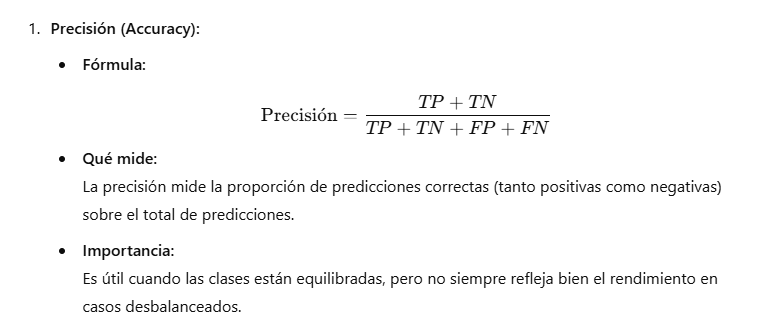

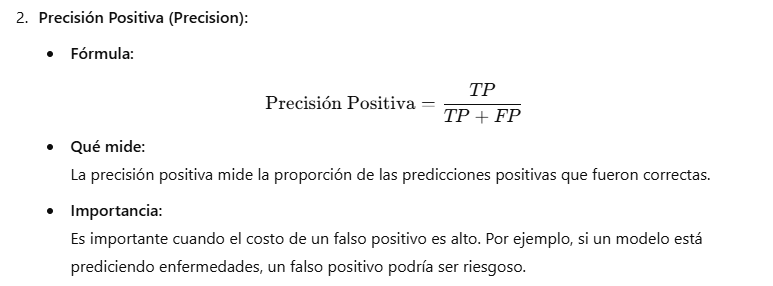

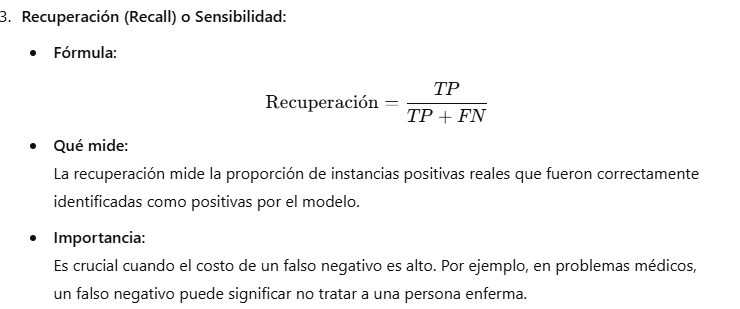

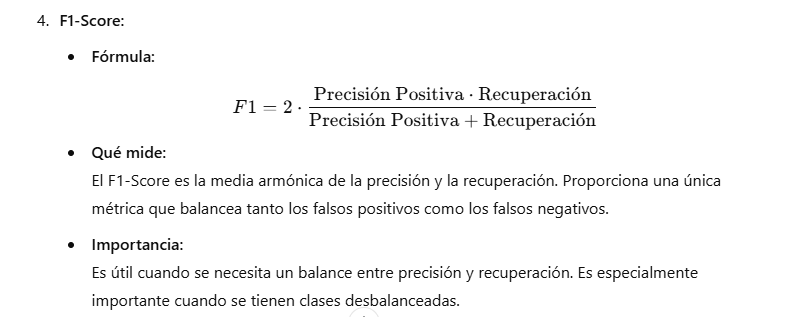

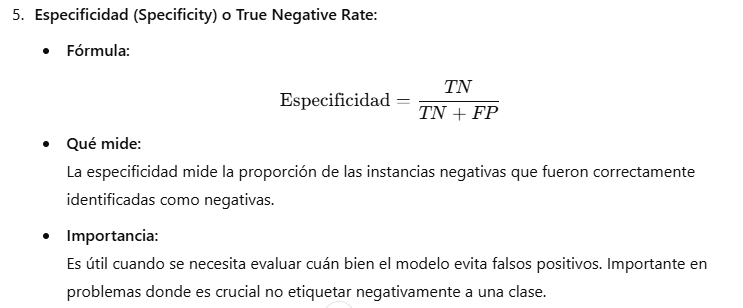

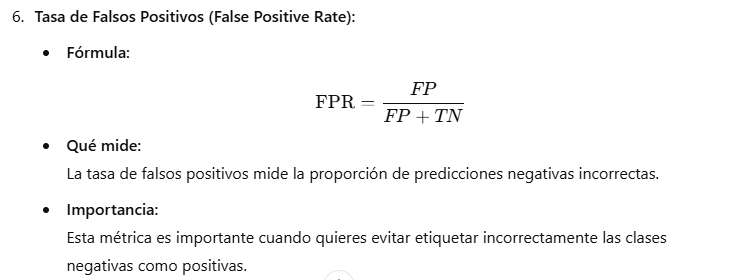

# Resumen de la importancia de cada métrica:
Precisión (Accuracy): Generalmente útil, pero no siempre es adecuada para clases desbalanceadas.
Precisión Positiva: Es útil cuando los falsos positivos son costosos o peligrosos (ej. diagnósticos erróneos).
Recuperación (Recall): Es importante cuando los falsos negativos tienen un alto costo (ej. diagnosticar enfermedades).
F1-Score: Útil cuando hay un balance entre precisión y recuperación, especialmente en problemas desbalanceados.
Especificidad: Evaluar la capacidad del modelo para identificar correctamente los negativos.
Tasa de Falsos Positivos (FPR): Indica cuántos negativos fueron clasificados erróneamente como positivos.
Cada una de estas métricas tiene un papel crucial dependiendo del contexto de la aplicación. Al seleccionar qué métricas usar, es importante considerar qué tipo de error (falsos positivos o falsos negativos) tiene un costo más alto en el problema específico que estás resolviendo.

Si necesitas más detalles o tienes alguna otra duda, no dudes en decirme. ¡Estoy aquí para ayudarte!

# Curva ROC

<Figure size 1000x800 with 0 Axes>

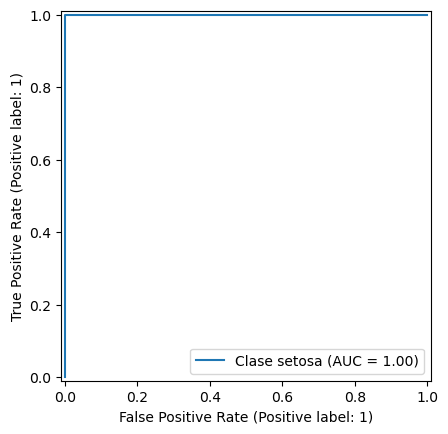

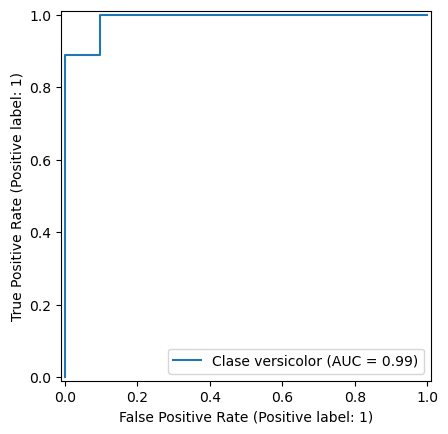

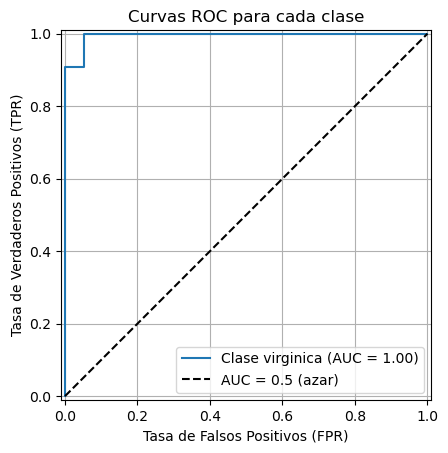


Promedio del AUC para todas las clases: 0.99


In [40]:
# Generar predicciones de probabilidad
y_prob = modelo.predict_proba(X_test)

# Graficar curvas ROC para cada clase
plt.figure(figsize=(10, 8))
classes = iris.target_names

for i in range(len(classes)):
    RocCurveDisplay.from_predictions(
        Y_test == i,  # Etiquetas binarias para la clase actual
        y_prob[:, i],  # Probabilidades para la clase actual
        name=f"Clase {classes[i]}"
    )

# Línea de referencia
plt.plot([0, 1], [0, 1], 'k--', label="AUC = 0.5 (azar)")
plt.title("Curvas ROC para cada clase")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Calcular el AUC promedio
auc_score = roc_auc_score(Y_test, y_prob, multi_class='ovr')
print(f"\nPromedio del AUC para todas las clases: {auc_score:.2f}")
